###  픽셀

이미지 데이터는 픽셀(pixel)이라고 하는 작은 이미지를 직사각형 형태로 모은 것이다. 각 픽셀은 단색의 직사각형이다. 전체 이미지의 크기를 표현할 때는 (세로 픽셀수 x 가로 픽셀수) 형식으로 표현한다.

이미지 데이터를 저장할때는 픽셀의 색을 표현하는 스칼라 값이나 벡터를 2차원 배열로 표현한다. 파이썬에서는 Numpy의 ndarray 클래스 배열로 표현한다.

####  그레이스 케일

그레이스케일에서는 모든색이 흑색, 각 픽셀은 명도를 나타내는 숫자로 표현 0은 검은색 숫자가 커질수록 명도가 증가하여 하안색이 된다

In [2]:
import scipy as sp
import scipy.misc
img_gray = sp.misc.face(gray=True)
img_gray.shape

(768, 1024)

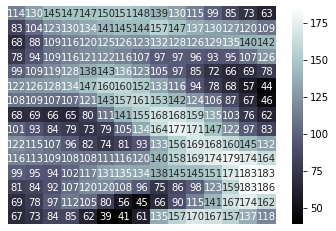

In [5]:
import matplotlib.pylab as plt
import seaborn as sns

sns.heatmap(img_gray[:15,:15], annot=True, fmt = 'd', cmap=plt.cm.bone)
plt.axis('off')
plt.show()

#### RGB 

RGB 색공간에서 색은 적 녹 청 의 3가지 색의 명도를 뜻하는 숫자 3개를 합쳐서 벡터로 표현

In [7]:
from sklearn.datasets import load_sample_images

dataset = load_sample_images()
img_rgb = dataset.images[1]
img_rgb.shape

(427, 640, 3)

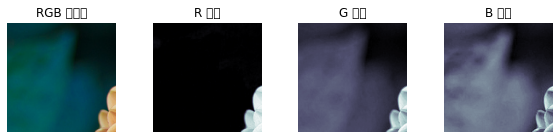

In [9]:
plt.figure(figsize=(10, 2))

plt.subplot(141)
plt.imshow(img_rgb[50:200, 50:200, :])
plt.axis("off")
plt.title("RGB 이미지")

plt.subplot(142)
plt.imshow(img_rgb[50:200, 50:200, 0], cmap=plt.cm.bone)
plt.axis("off")
plt.title("R 채널")

plt.subplot(143)
plt.imshow(img_rgb[50:200, 50:200, 1], cmap=plt.cm.bone)
plt.axis("off")
plt.title("G 채널")

plt.subplot(144)
plt.imshow(img_rgb[50:200, 50:200, 2], cmap=plt.cm.bone)
plt.axis("off")
plt.title("B 채널")

plt.show()


####  HSV

- 색상 (Hue) : 색상값, 가시광선 스펙트럼을 주파수 별로 고리모양으로 배치했을때의 각도이다. 0도~360도의 범위를 갖고 360도와 0도는 빨강을 가리킨다
- 채도(Saturation): 채도값 S는 특정한 색상의 진함의 정도를 나타낸다. 가장 진한 상태를 100%이고 0%는 같은 명도의 무채색이다.
- 명도(Value): 명도값 V는 밝은 정도를 나타낸다. 순수한 흰색, 빨간색은 100%이고 검은색은 0%이다.


In [11]:
from matplotlib.colors import hsv_to_rgb
import numpy as np
V, H = np.mgrid[0:1:100j, 0:1:360j]
S = np.ones_like(V)

HSV_S100 = np.dstack((H, S * 1.0, V))
RGB_S100 = hsv_to_rgb(HSV_S100)
HSV_S20 = np.dstack((H, S * 0.2, V))
RGB_S20 = hsv_to_rgb(HSV_S20)

HSV_S20.shape

(100, 360, 3)

In [12]:
# 색상(Hue)
HSV_S20[:4, :5, 0]

array([[0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206],
       [0.        , 0.00278552, 0.00557103, 0.00835655, 0.01114206]])

In [13]:
# 채도(Saturation)
HSV_S20[:4, :5, 1]

array([[0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2],
       [0.2, 0.2, 0.2, 0.2, 0.2]])

In [14]:
# 명도(Value)
HSV_S20[:4, :5, 2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.01010101, 0.01010101, 0.01010101, 0.01010101, 0.01010101],
       [0.02020202, 0.02020202, 0.02020202, 0.02020202, 0.02020202],
       [0.03030303, 0.03030303, 0.03030303, 0.03030303, 0.03030303]])

C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49353 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82109\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 46412 missing from c

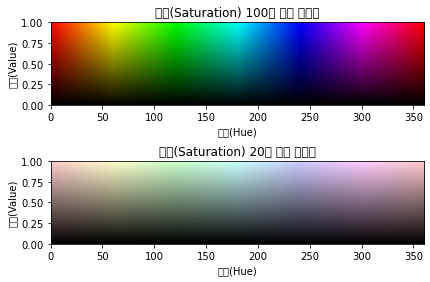

In [15]:
plt.subplot(211)
plt.imshow(RGB_S100, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 100일 때의 색공간")
plt.grid(False)

plt.subplot(212)
plt.imshow(RGB_S20, origin="lower", extent=[0, 360, 0, 1], aspect=80)
plt.xlabel("색상(Hue)")
plt.ylabel("명도(Value)")
plt.title("채도(Saturation) 20일 때의 색공간")
plt.grid(False)

plt.tight_layout()
plt.show()

###  이미지 파일 형식

- JPEG : JPEG 는 Joint Picture Experts Group 의 약자로 이미지 압축 기술자 모임인 JPEG 위원회에서 개발한 이미지 파일 형식이다. JPEG 파일은 웹상 및 멀티미디어 환경에서 가장 널리 사용되고 있는 포맷이다. JPG라는 확장자도 같이 사용된다.
    - 장점
        1. RGB모드와 CMYK 모드를 둘다 지원한다.
        2. RGB 이미지의 모든 컬러 정보를 유지한다.
        3. 이미지를 만드는 사람이 이미지의 질과 파일의 크기를 손실압축방식을 통해 조정할 수 있다.
        
    - 단점
        1. 투명 이미지를 지원하지 않는다.
        2. 압축율을 높일 수록 이미지의 질이 손상된다.
        3. 레이어와 알파채널을 지원하지 않는다.
        
- GIF : GIF는 Graphics Interchange Format의 약자로 1987년 미국의 통신업체인 컴퓨시브(Compuserve)에서 개발한 포맷이다.
    - 장점
        1. 하나의 파일에 여러 비트맵을 저장하여 다중 프레임 애니메이션을 구현 할 수 있다.
        2. 투명 이미지를 지원한다.
        3. 애니메이션을 특별한 플러그인 없이 여러 환경에서 쉽게 적용할 수 있ㅎ다.
        
    - 단점
    1. 8비트 256 컬러로 제한된다.
    
- png : PNG는 Potable Network Graphics의 약자이다. GIF 포맷을 대체하기 위해 개발된 파일 포맷이다.
    - 장점
        1. 비손실 압축방식으로 원본에 손상 없이 파일의 크기를 줄여준다.
        2. 이미지의 모든 컬러정보와 알파 채널을 보존하고 있으므로 포토샵에서 활용하기 용이하다.
        3. 문자 혹은 날카로운 경계가 있는 이미지인 경우 JPG보다 PNG보다 효과적이다.
    
    - 단점
        1. 애니메이션을 만들 수 없다.
        2. JPG와 GIF보다 용량이 크다.

####  Pillow 를 이용한 이미지 처리



In [16]:
import PIL

PIL.__version__

'6.2.0'

In [18]:
from PIL import Image

img_logo_png = Image.open('./12.jpg')

In [19]:
img_logo_png.size

(720, 960)

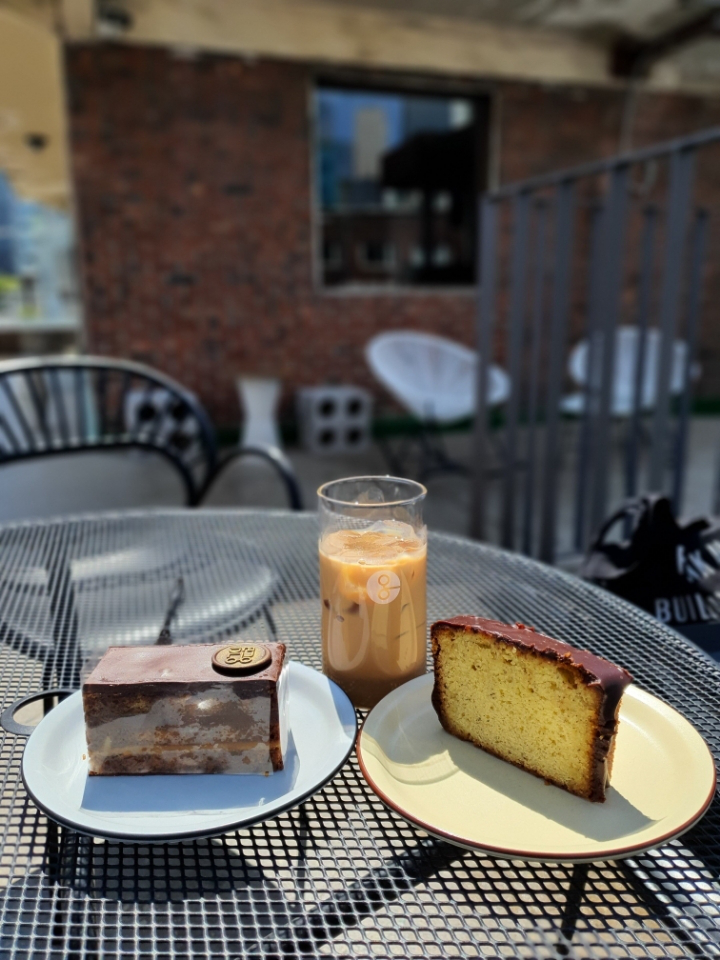

In [20]:
img_logo_png

In [21]:
img_logo_array = np.array(img_logo_png)

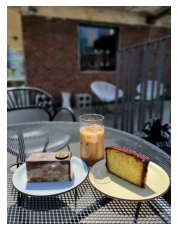

In [22]:
plt.imshow(img_logo_array)
plt.axis('off')
plt.show()

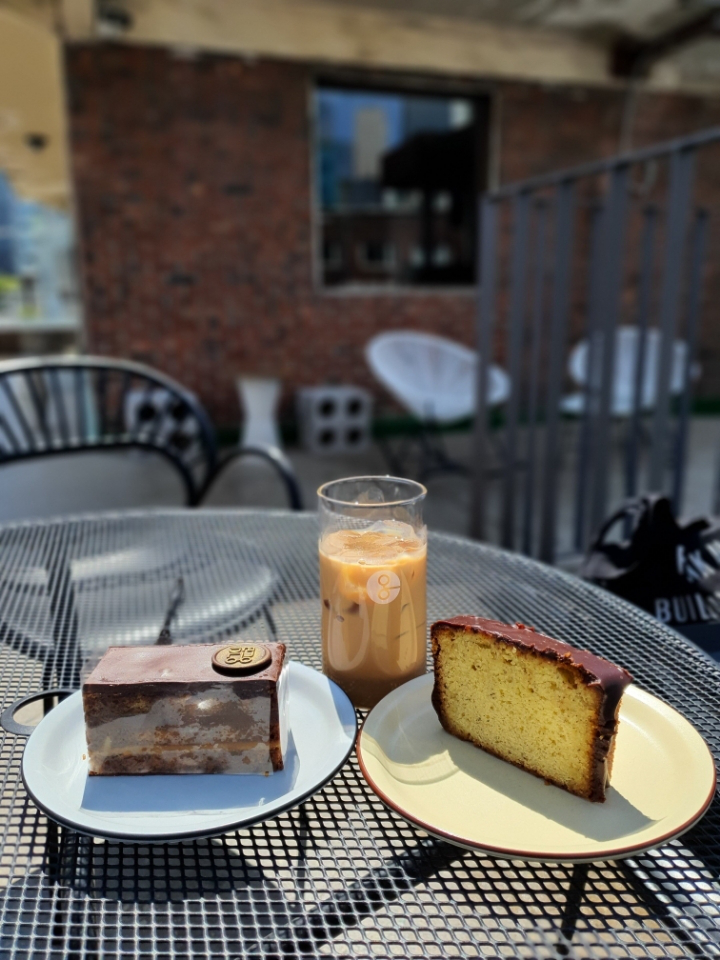

In [23]:
Image.fromarray(img_logo_array)

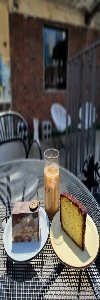

In [25]:
img_logo_png2 = img_logo_png.resize((100,300))
img_logo_png2

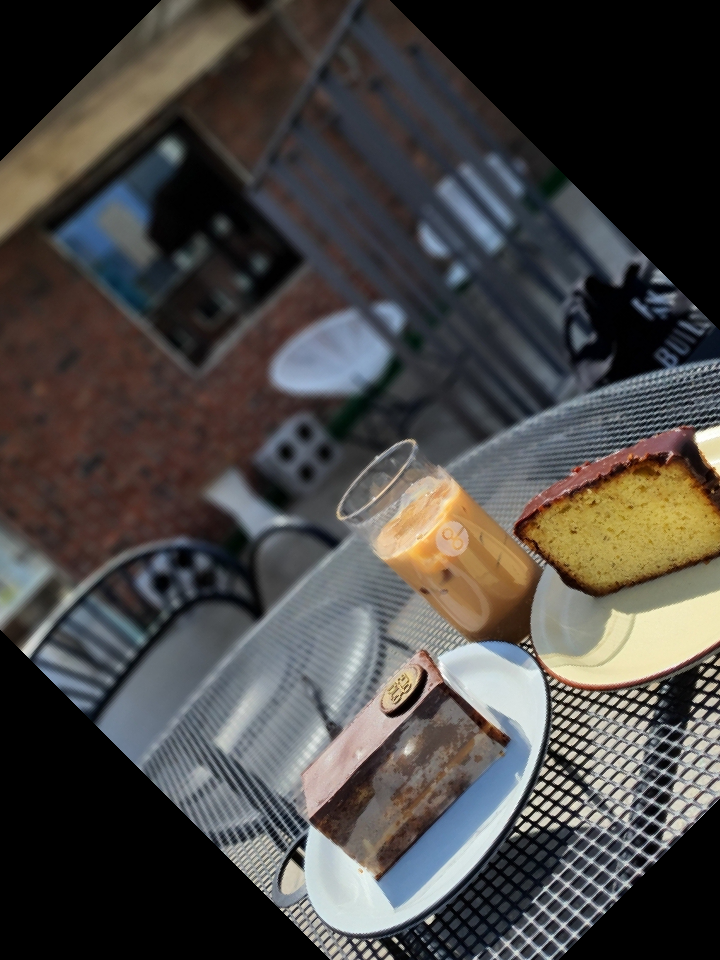

In [26]:
img_logo_retated= img_logo_png.rotate(45)
img_logo_retated

In [27]:
import skimage
skimage.__version__

'0.15.0'

In [28]:
import skimage.data

img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

In [29]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

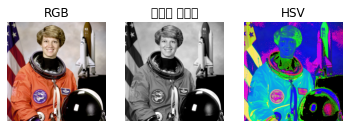

In [31]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("그레이 스케일")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()

In [32]:
import cv2
cv2.__version__

'4.2.0'

In [34]:
img_astro3 = cv2.imread('./astronaut.png')
img_astro3.shape

(512, 512, 3)

In [35]:
b, g, r = cv2.split(img_astro3)

img_astro3_rgb = cv2.merge([r,g,b])

img_astro3_gray = cv2.cvtColor(img_astro3, cv2.COLOR_BGR2GRAY)

In [36]:
cv2.imwrite('./gray_astronaut.png', img_astro3_gray)

True